 Implementation

In [13]:
import numpy as np

In [14]:
#model parameters
input_size =3#no_of_features
layers=[4,3] #no of features in 1st and 2nd layer
output_size=2

In [15]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        self.model = {}  # dictionary to store the model parameters

        # First layer
        self.model['W1'] = np.random.randn(input_size, layers[0])
        self.model['b1'] = np.zeros((1, layers[0]))

        # Second layer
        self.model['W2'] = np.random.randn(layers[0], layers[1])
        self.model['b2'] = np.zeros((1, layers[1]))

        # Third/Output Layer
        self.model['W3'] = np.random.randn(layers[1], output_size)
        self.model['b3'] = np.zeros((1, output_size))

    def forward(self, x):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']

        z1 = np.dot(x, W1) + b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)
        z3 = np.dot(a2, W3) + b3
        y_ = self.softmax(z3)

        self.activation_outputs = (a1, a2, y_)
        return y_

    def backward(self, x, y, learning_rate=0.1):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        m = x.shape[0]

        a1, a2, y_ = self.activation_outputs

        delta3 = y_ - y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0) / float(m)

        delta2 = (1 - np.square(a2)) * np.dot(delta3, W3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0) / float(m)

        delta1 = (1 - np.square(a1)) * np.dot(delta2, W2.T)
        dw1 = np.dot(x.T, delta1)
        db1 = np.sum(delta1, axis=0) / float(m)

        # Updating the model parameters
        self.model['W1'] -= learning_rate * dw1
        self.model['b1'] -= learning_rate * db1

        self.model['W2'] -= learning_rate * dw2
        self.model['b2'] -= learning_rate * db2

        self.model['W3'] -= learning_rate * dw3
        self.model['b3'] -= learning_rate * db3

    def predict(self, x):
        y_out = self.forward(x)
        return np.argmax(y_out, axis=1)

    def summary(self):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        a1, a2, y_ = self.activation_outputs

        print("W1", W1.shape)
        print("A1", a1.shape)

        print("W2", W2.shape)
        print("A2", a2.shape)

        print("W3", W3.shape)
        print("Y_", y_.shape)

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)


In [16]:
w1=np.random.randn(input_size,layers[0])
print(w1)

[[-0.12300825 -1.48441447 -0.03641159 -1.43518921]
 [-0.6748905   1.08607396 -2.0773183   0.66704733]
 [-1.39330863 -0.9370649   0.28652014 -0.35269276]]


Underdstanding Forward Propagation

In [17]:
#One Hot Notation
#we can not feed those labels to any classifier which are string ....so convert string ia rrotation
#convert column vector to row vector
import numpy as np

import numpy as np

# One-hot encoding
def One_hot(y, depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

# Loss calculation
def loss(y_oht, p):
    l = -np.mean(np.log(p[np.arange(y_oht.shape[0]), np.argmax(y_oht, axis=1)]))
    return l







In [18]:
#Generate dataset
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


In [19]:
x,y=make_circles(n_samples=500,shuffle=True,noise=0.05,random_state=1,factor=0.8)

In [20]:
print(y)

[1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 1 0 

<ipython-input-21-5c943acac12c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


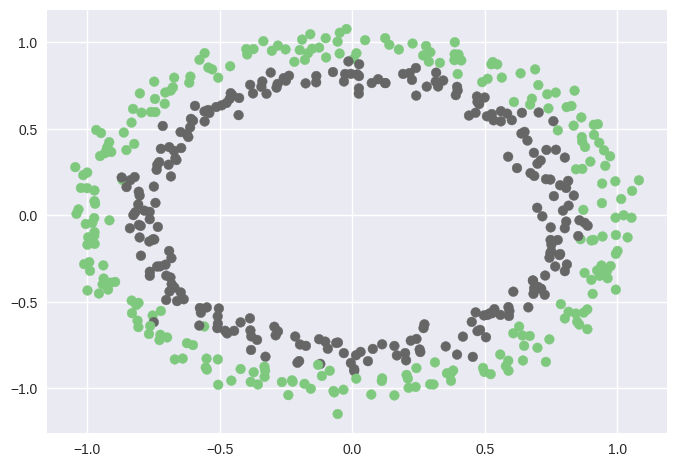

In [21]:
plt.style.use("seaborn")
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent)
plt.show()

In [22]:
yoht=One_hot(y,3)
print(yoht)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [23]:
input_size = 2
layers = [10, 4]
output_size = 2

model = NeuralNetwork(input_size, layers, output_size)  # Instantiate the NeuralNetwork class

output = model.forward(x)  # Call the forward method on the model object
print(output)


[[0.07135496 0.92864504]
 [0.0252705  0.9747295 ]
 [0.15439902 0.84560098]
 [0.02590134 0.97409866]
 [0.97423778 0.02576222]
 [0.96419691 0.03580309]
 [0.03741109 0.96258891]
 [0.73047016 0.26952984]
 [0.95510868 0.04489132]
 [0.02219465 0.97780535]
 [0.02827971 0.97172029]
 [0.81149347 0.18850653]
 [0.03740692 0.96259308]
 [0.0268464  0.9731536 ]
 [0.06447007 0.93552993]
 [0.96869361 0.03130639]
 [0.95539586 0.04460414]
 [0.41339302 0.58660698]
 [0.10224504 0.89775496]
 [0.14103553 0.85896447]
 [0.24757086 0.75242914]
 [0.04693912 0.95306088]
 [0.04204106 0.95795894]
 [0.96445179 0.03554821]
 [0.028442   0.971558  ]
 [0.06121185 0.93878815]
 [0.6861095  0.3138905 ]
 [0.02468014 0.97531986]
 [0.8907949  0.1092051 ]
 [0.97606298 0.02393702]
 [0.95595069 0.04404931]
 [0.05322091 0.94677909]
 [0.97209512 0.02790488]
 [0.96864746 0.03135254]
 [0.02385454 0.97614546]
 [0.05760286 0.94239714]
 [0.75155261 0.24844739]
 [0.93909881 0.06090119]
 [0.24968468 0.75031532]
 [0.03031124 0.96968876]


Training Our Model

In [24]:
model=NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [25]:
model.forward(x).shape


(500, 2)

In [26]:
#total parameters for out model
#this convert the high dimentional data into low dimension see at activation *
model.summary()

W1 (2, 10)
A1 (500, 10)
W2 (10, 5)
A2 (500, 5)
W3 (5, 2)
Y_ (500, 2)


In [27]:
# logs ->tell if i want to print some summary or not
def train(x,y,model,epochs,learning_rate,logs=True):
  training_loss=[]
  classes=2
  y_OHT=One_hot(y,classes)
  for ix in range(epochs):
    y_=model.forward(x)
    l=loss(y_OHT,y_)
    training_loss.append(l)
    model.backward(x,y_OHT,learning_rate)

    if(logs):
      print("Epoch %d loss %.23f "%(ix,l))
  return training_loss


In [28]:
losses=train(x,y,model,50,0.001,)

Epoch 0 loss 0.71681237377411144429118 
Epoch 1 loss 0.69718878627578761975059 
Epoch 2 loss 0.69598768274761235730352 
Epoch 3 loss 0.69557947073549053484953 
Epoch 4 loss 0.69526513998314443121274 
Epoch 5 loss 0.69500729393339788497741 
Epoch 6 loss 0.69479349713197480209459 
Epoch 7 loss 0.69461455190708965012902 
Epoch 8 loss 0.69446324854958585426346 
Epoch 9 loss 0.69433392272447214121911 
Epoch 10 loss 0.69422212097818281062445 
Epoch 11 loss 0.69412433842088783197966 
Epoch 12 loss 0.69403781311259626907173 
Epoch 13 loss 0.69396036518636738943400 
Epoch 14 loss 0.69389027109918632874042 
Epoch 15 loss 0.69382616537681829349538 
Epoch 16 loss 0.69376696383293412484505 
Epoch 17 loss 0.69371180354098571640975 
Epoch 18 loss 0.69365999586880644489639 
Epoch 19 loss 0.69361098969864010133080 
Epoch 20 loss 0.69356434259199017944297 
Epoch 21 loss 0.69351969815555525311623 
Epoch 22 loss 0.69347676825132997802115 
Epoch 23 loss 0.69343531899463672907302 
Epoch 24 loss 0.6933951597

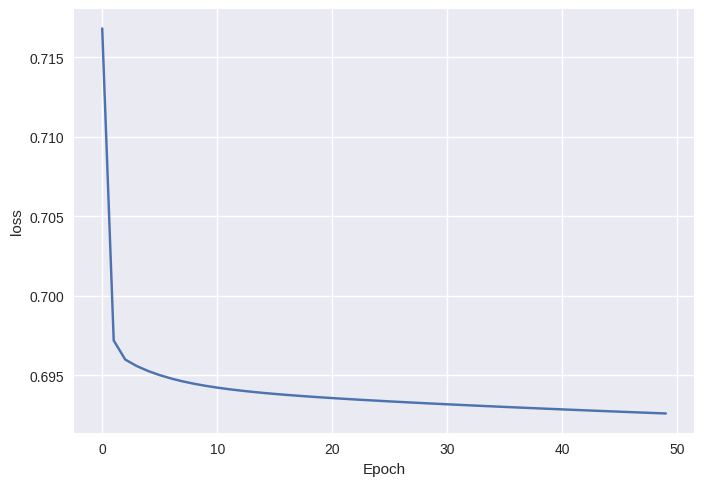

In [29]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the value of the function for all the points in the grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour filled regions
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


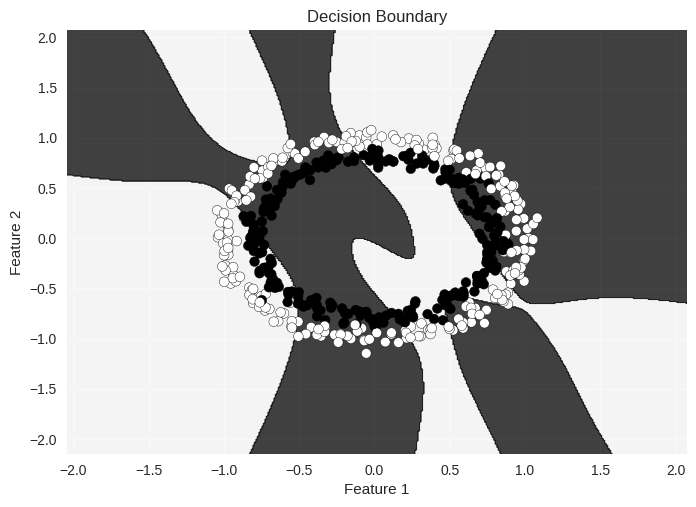

In [31]:
plot_decision_boundary(lambda x: model.predict(x), x, y)


In [32]:
output=model.predict(x)
np.sum(output==y)/y.shape[0]

0.496

Testing on other non-linear datasets

In [34]:
model=NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

XOR dataset

In [35]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])

In [40]:
losses=train(x,y,model,50,0.01)

Epoch 0 loss 0.18885015394905896313205 
Epoch 1 loss 0.18695406151914523151802 
Epoch 2 loss 0.18508299764054320091233 
Epoch 3 loss 0.18323673772210835597463 
Epoch 4 loss 0.18141505000946051007205 
Epoch 5 loss 0.17961769622592277384499 
Epoch 6 loss 0.17784443218673839925970 
Epoch 7 loss 0.17609500838672048628197 
Epoch 8 loss 0.17436917056158404704114 
Epoch 9 loss 0.17266666022330537377805 
Epoch 10 loss 0.17098721516992262947632 
Epoch 11 loss 0.16933056997026696421926 
Epoch 12 loss 0.16769645642416125541629 
Epoch 13 loss 0.16608460399867530643547 
Epoch 14 loss 0.16449474024106702785275 
Epoch 15 loss 0.16292659116906443861339 
Epoch 16 loss 0.16137988163917782458157 
Epoch 17 loss 0.15985433569374518647521 
Epoch 18 loss 0.15834967688742757063736 
Epoch 19 loss 0.15686562859388566981700 
Epoch 20 loss 0.15540191429336802642069 
Epoch 21 loss 0.15395825784194683283346 
Epoch 22 loss 0.15253438372313338211583 
Epoch 23 loss 0.15113001728259781164532 
Epoch 24 loss 0.1497448849

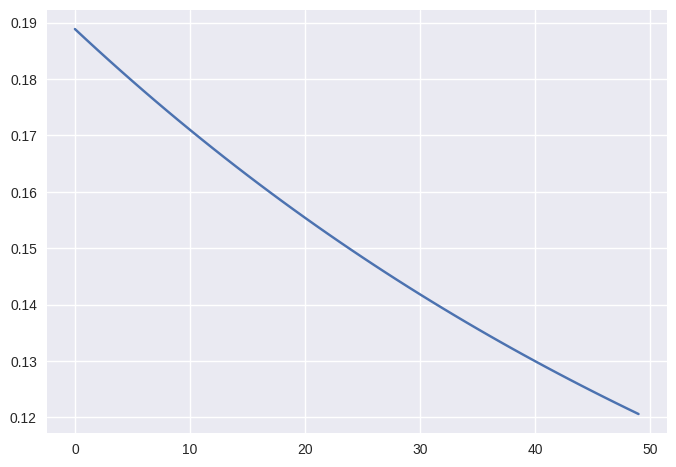

In [41]:
plt.plot(losses)

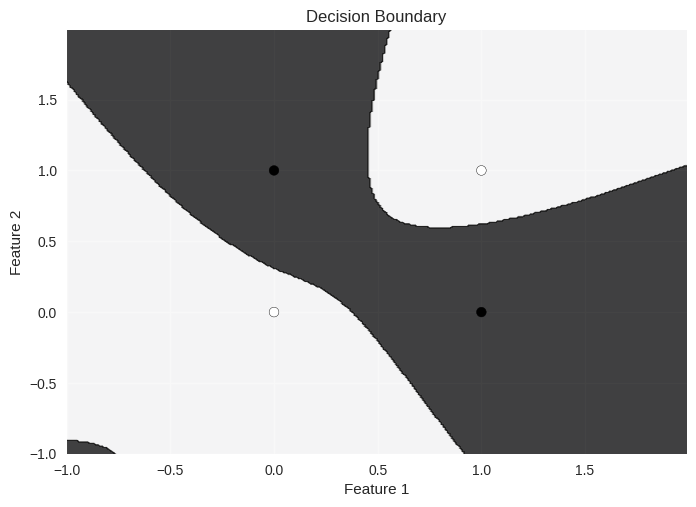

In [39]:
plot_decision_boundary(lambda x: model.predict(x),x,y)

In [42]:
output=model.predict(x)
np.sum(output==y)/y.shape[0]
#now we got the 100% accurcy

1.0

Other Datasets

In [43]:
from sklearn.datasets import make_moons ,make_circles,make_classification


In [44]:
def load_dataset(dataset):
  if dataset=='moons':
    x,y=make_moons(n_samples=500,noise=0.2,random_state=1)
  elif dataset=='circles':
    x,y=make_circles(n_samples=500,shuffle=True ,noise=0.2,random_state=1,factor=0.2)
  elif dataset=='classification':
    x,y=make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0)
  else:
    #create xor dataset
    x=np.array([[0,0],[0,1],[1,0],[1,1]])
    y=np.array([0,1,1,0])
  return x,y

Training Acc 1.0000


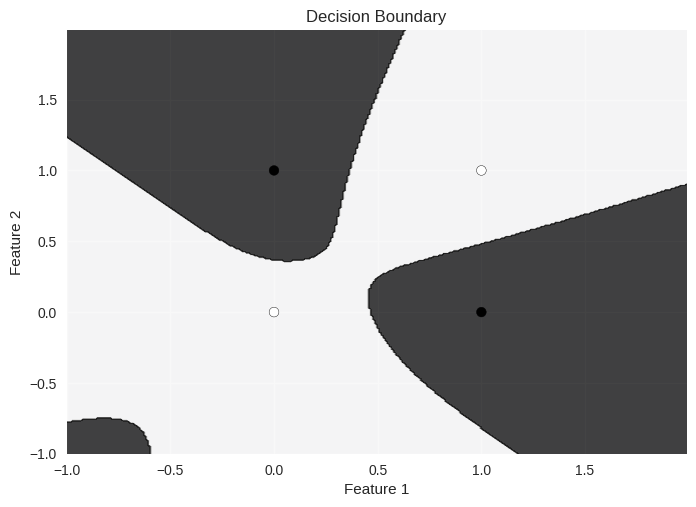

Training Acc 0.9580


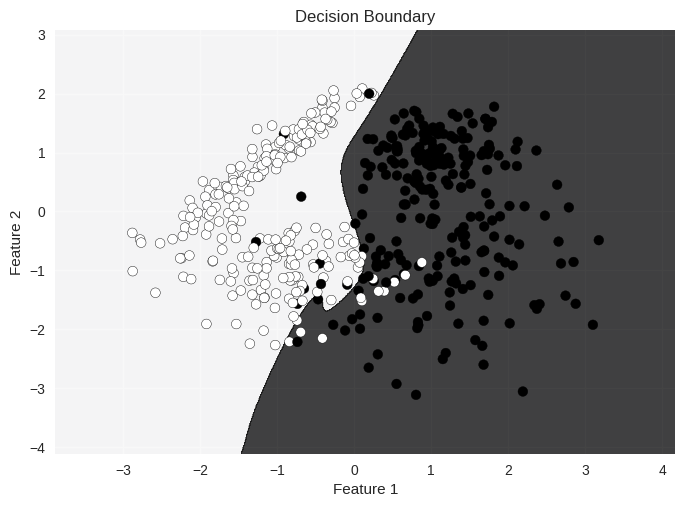

Training Acc 0.9740


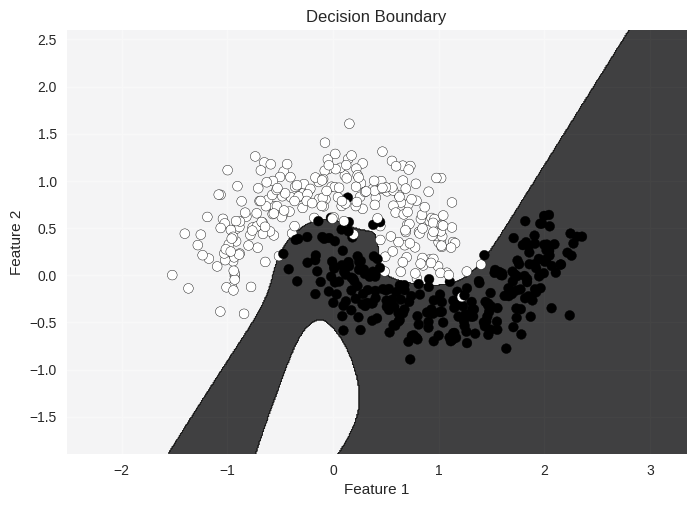

Training Acc 0.9620


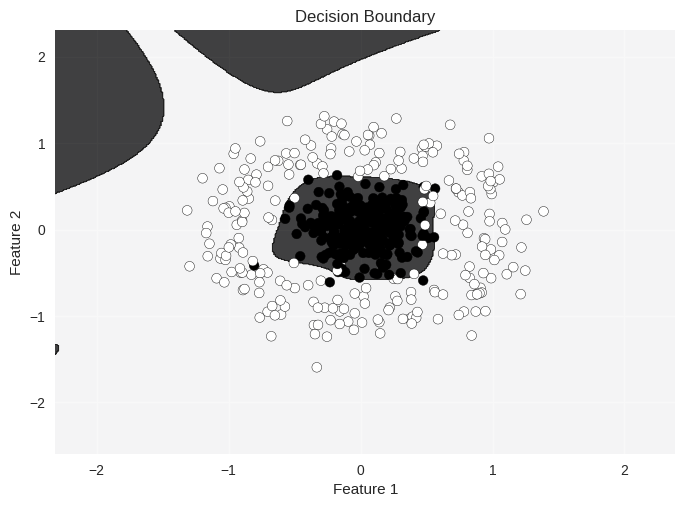

In [46]:
datasets=["xor","classification","moons","circles"]
for d in datasets:
  model =NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
  x,y=load_dataset(d)
  train(x,y,model,10000,0.001,logs=False)
  outputs=model.predict(x)

  training_accuracy=np.sum(outputs==y)/y.shape[0]
  print("Training Acc %.4f"%training_accuracy)

  plt.title("Dataset "+d)
  plot_decision_boundary(lambda x: model.predict(x),x,y)
  plt.show()